## Task 03 - Image Analysis

Name: Felipe Pereira

### IMPORTANT: If you are using pyenv, you must define the path to it, otherwise leave it commented

In [1]:
#import sys
#sys.path.append('/home/felipe/python_envs/env_felipe/lib/python3.8/site-packages')

### IMPORTANT: Set these variables

In [2]:
# Folder where the original images are (relative path to notebook location)
originals_folder='plates/originals/'
masks_folder='plates/masks/'

### IMPORTANT: Create this folder in operating system first
# Folder where the output images will be created (relative path to notebook location) 
output_folder='output/'

# Filter to use when processing images

## One specific image (for debugging)
image_filter='0200.png'

## All images
#image_filter='.png'

### Libraries

In [3]:
# Importing libraries that were used in this notebook
import cv2
import glob, os
import numpy as np
import pandas as pd

from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
import matplotlib.pyplot as plt
import argparse

import skimage.measure

from PIL import Image
from sklearn.datasets import load_sample_image
from sklearn.feature_extraction import image

import sys
from time import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

from skimage.data import lfw_subset
from skimage.transform import integral_image
from skimage.feature import haar_like_feature
from skimage.feature import haar_like_feature_coord
from skimage.feature import draw_haar_like_feature

/home/felipe/.local/lib/python3.8/site-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 7.1.0. Several security issues (CVE-2020-11538, CVE-2020-10379, CVE-2020-10994, CVE-2020-10177) have been fixed in pillow 7.1.0 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


### Dataset composition

In [4]:
for file_name in os.listdir(originals_folder):
    
    if file_name.endswith(image_filter):
        
        # Looping through files
        print('Processing file: {}'.format(file_name))
    
        # Reading image
        image = cv2.imread(originals_folder + file_name,cv2.IMREAD_GRAYSCALE)

        # Setting initial patch center    
        width_img=50

        # Setting final dimensions
        last_height_img=225
        last_width_img=325

        # Setting stride
        stride_pixels=15

        # Defining patch number
        patch_number=1

        while width_img <= last_width_img:

            # Setting initial patch center    
            height_img=50 

            while height_img <= last_height_img:                   

                # Defining some values
                patch_center = np.array([height_img, width_img])        
                patch_scale = 0.38

                # Calc patch position and extract the patch
                smaller_dim = np.min(image.shape[0:2])
                patch_size = int(patch_scale * smaller_dim)
                patch_x = int(patch_center[0] - patch_size / 2.)
                patch_y = int(patch_center[1] - patch_size / 2.)
                patch_image = image[patch_x:patch_x+patch_size, patch_y:patch_y+patch_size]

                # Transforming gray scalte to bgr
                rgb_patch = cv2.cvtColor(patch_image, cv2.COLOR_GRAY2BGR)
                #rgb_patch = patch_image

                # Transforming bgr to ycrcb
                ycrcb_patch = cv2.cvtColor(rgb_patch, cv2.COLOR_BGR2YCrCb)

                # Writing output            
                patch_output = file_name.replace('.png','') + '_p' + str(patch_number) + '.png'                
                cv2.imwrite(output_folder + patch_output,ycrcb_patch)

                # Updating height loop var
                height_img = height_img + stride_pixels
                patch_number = patch_number + 1

                # Debugging                
                #print('Height: {}'.format(height_img))
                #print('Width: {}'.format(width_img))
                #print('Patch Number: {}'.format(patch_number))

            # Updating width loop var
            width_img = width_img + stride_pixels               
        
        # Looping through files
        print('Processed file: {}'.format(file_name))

Processing file: orig_0200.png
Processed file: orig_0200.png


### Batch Normalization

In [5]:
for file_name in os.listdir(originals_folder):
    
    if file_name.endswith(image_filter):
        
        # Looping through files
        print('Processing file: {}'.format(file_name))
    
        # Reading image
        image = cv2.imread(originals_folder + file_name,cv2.IMREAD_GRAYSCALE)

        # Setting initial patch center    
        width_img=50

        # Setting final dimensions
        last_height_img=225
        last_width_img=325
        #last_height_img=75
        #last_width_img=50

        # Setting stride
        stride_pixels=15

        # Defining patch number
        patch_number=1

        while width_img <= last_width_img:

            # Setting initial patch center    
            height_img=50 

            while height_img <= last_height_img:                   

                # Defining some values
                patch_center = np.array([height_img, width_img])        
                patch_scale = 0.38

                # Calc patch position and extract the patch
                smaller_dim = np.min(image.shape[0:2])
                patch_size = int(patch_scale * smaller_dim)
                patch_x = int(patch_center[0] - patch_size / 2.)
                patch_y = int(patch_center[1] - patch_size / 2.)
                patch_image = image[patch_x:patch_x+patch_size, patch_y:patch_y+patch_size]

                # Transforming gray scalte to bgr
                rgb_patch = cv2.cvtColor(patch_image, cv2.COLOR_GRAY2BGR)
                #rgb_patch = patch_image

                # Transforming bgr to ycrcb
                ycrcb_patch = cv2.cvtColor(rgb_patch, cv2.COLOR_BGR2YCrCb)
        
                # Transforming image into an array
                #c1_array = np.asarray(rgb_patch[:,:,0])
                #c2_array = np.maximum(0, np.asarray(rgb_patch[:,:,1])+100 )
                #c3_array = np.maximum(0, np.asarray(rgb_patch[:,:,2])+200 )
                
                c1_array = np.asarray(ycrcb_patch[:,:,0])
                c2_array = np.maximum(0, np.asarray(ycrcb_patch[:,:,1])+100 )
                c3_array = np.maximum(0, np.asarray(ycrcb_patch[:,:,2])+200 )
        
                # Getting array metrics        
                #print('Channel 1 - Metrics:')
                #print('Sum of pixels: {}'.format(np.sum(c1_array)))
                #print('Mean of pixels: {}'.format(np.mean(c1_array)))
                #print('Std of pixels: {}'.format(np.std(c1_array)))
                #print('Array shape: {}'.format(c1_array.shape))
                #print(' ')
                #print('Channel 2 - Metrics:')
                #print('Sum of pixels: {}'.format(np.sum(c2_array)))
                #print('Mean of pixels: {}'.format(np.mean(c2_array)))
                #print('Std of pixels: {}'.format(np.std(c2_array)))
                #print(' ')
                #print('Channel 3 - Metrics:')
                #print('Sum of pixels: {}'.format(np.sum(c3_array)))
                #print('Mean of pixels: {}'.format(np.mean(c3_array)))
                #print('Std of pixels: {}'.format(np.std(c3_array)))
                #print(' ')
                
                # Normalization
                c1_array_mm = c1_array - c1_array.mean(axis=1, keepdims=True)
                c1_array_normalized = c1_array_mm / c1_array.std(axis=1, keepdims=True)
                
                c2_array_mm = c2_array - c2_array.mean(axis=1, keepdims=True)
                c2_array_normalized = c2_array_mm / c2_array.std(axis=1, keepdims=True)
                
                c3_array_mm = c3_array - c3_array.mean(axis=1, keepdims=True)
                c3_array_normalized = c3_array_mm / c1_array.std(axis=1, keepdims=True)
                
                # Getting array metrics  
                #print('Channel 1 Normalized - Metrics:')
                #print('Sum of pixels: {}'.format(np.sum(c1_array_normalized)))
                #print('Mean of pixels: {}'.format(np.mean(c1_array_normalized)))
                #print('Std of pixels: {}'.format(np.std(c1_array_normalized)))
                #print('Array shape: {}'.format(c1_array_normalized.shape))
                #print(' ')
                #print('Channel 2 Normalized - Metrics:')
                #print('Sum of pixels: {}'.format(np.sum(c2_array_normalized)))
                #print('Mean of pixels: {}'.format(np.mean(c2_array_normalized)))
                #print('Std of pixels: {}'.format(np.std(c2_array_normalized)))
                #print(' ')
                #print('Channel 3 Normalized - Metrics:')
                #print('Sum of pixels: {}'.format(np.sum(c3_array_normalized)))
                #print('Mean of pixels: {}'.format(np.mean(c3_array_normalized)))
                #print('Std of pixels: {}'.format(np.std(c3_array_normalized)))
                #print(' ')
                
                # Writing output            
                patch_output = file_name.replace('.png','') + '_p' + str(patch_number) + '_c1_normalized.png'                
                Image.fromarray(c1_array_normalized).convert('RGB').save(output_folder + patch_output)
                
                patch_output = file_name.replace('.png','') + '_p' + str(patch_number) + '_c2_normalized.png'                
                Image.fromarray(c2_array_normalized).convert('RGB').save(output_folder + patch_output)
                
                patch_output = file_name.replace('.png','') + '_p' + str(patch_number) + '_c3_normalized.png'                
                Image.fromarray(c3_array_normalized).convert('RGB').save(output_folder + patch_output)
                
                #cv2.imwrite('output/' + patch_output,gr_im)                
                
                # Updating height loop var
                height_img = height_img + stride_pixels                                
                patch_number = patch_number + 1

            # Updating width loop var
            width_img = width_img + stride_pixels       
        
        # Looping through files
        print('Processed file: {}'.format(file_name))

Processing file: orig_0200.png


<ipython-input-5-9aae958f1a8c>:83: RuntimeWarning: invalid value encountered in true_divide
  c2_array_normalized = c2_array_mm / c2_array.std(axis=1, keepdims=True)


Processed file: orig_0200.png


### Random Kernels

In [6]:
# Creating random matrices
kernel_01 = np.random.rand(3,3)
kernel_01_mean = kernel_01 - kernel_01.mean(axis=1, keepdims=True)

kernel_02 = np.random.rand(3,3)
kernel_02_mean = kernel_02 - kernel_02.mean(axis=1, keepdims=True)

kernel_03 = np.random.rand(3,3)
kernel_03_mean = kernel_03 - kernel_03.mean(axis=1, keepdims=True)

In [7]:
kernel_01

array([[0.58069613, 0.94756041, 0.52642286],
       [0.3364964 , 0.73441361, 0.69283277],
       [0.14605156, 0.61796451, 0.48410808]])

In [8]:
kernel_01_mean

array([[-0.104197  ,  0.26266727, -0.15847027],
       [-0.25141786,  0.14649935,  0.10491851],
       [-0.26998982,  0.20192313,  0.0680667 ]])

In [9]:
kernel_02

array([[0.54544661, 0.75421497, 0.18371798],
       [0.72983916, 0.55757756, 0.94098948],
       [0.61836474, 0.44041234, 0.66662329]])

In [10]:
kernel_03

array([[0.46276954, 0.10976636, 0.3723776 ],
       [0.87072748, 0.40848341, 0.19537233],
       [0.88658608, 0.25227473, 0.04746517]])

In [11]:
kernel_sobel = np.array([[-1, 0, -1], [-2, 0, 2], [-1, 0, 1]])
kernel_sobel

array([[-1,  0, -1],
       [-2,  0,  2],
       [-1,  0,  1]])

### Convolution

In [12]:
def convolve2D(image, kernel, padding=0, strides=1):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[0]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        print(imagePadded)
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output

In [13]:
for file_name in os.listdir(originals_folder):
    
    if file_name.endswith(image_filter):
        
        # Looping through files
        print('Processing file: {}'.format(file_name))
    
        # Reading image
        image = cv2.imread(originals_folder + file_name,cv2.IMREAD_GRAYSCALE)

        # Setting initial patch center    
        width_img=50

        # Setting final dimensions
        last_height_img=225
        last_width_img=325
        #last_height_img=75
        #last_width_img=50

        # Setting stride
        stride_pixels=15

        # Defining patch number
        patch_number=1

        while width_img <= last_width_img:

            # Setting initial patch center    
            height_img=50 

            while height_img <= last_height_img:                   

                # Defining some values
                patch_center = np.array([height_img, width_img])        
                patch_scale = 0.38

                # Calc patch position and extract the patch
                smaller_dim = np.min(image.shape[0:2])
                patch_size = int(patch_scale * smaller_dim)
                patch_x = int(patch_center[0] - patch_size / 2.)
                patch_y = int(patch_center[1] - patch_size / 2.)
                patch_image = image[patch_x:patch_x+patch_size, patch_y:patch_y+patch_size]

                # Transforming gray scalte to bgr
                rgb_patch = cv2.cvtColor(patch_image, cv2.COLOR_GRAY2BGR)
                #rgb_patch = patch_image

                # Transforming bgr to ycrcb
                ycrcb_patch = cv2.cvtColor(rgb_patch, cv2.COLOR_BGR2YCrCb)
        
                # Transforming image into an array
                c1_array = np.asarray(ycrcb_patch[:,:,0])
                c2_array = np.maximum(0, np.asarray(ycrcb_patch[:,:,1])+100 )
                c3_array = np.maximum(0, np.asarray(ycrcb_patch[:,:,2])+200 )
                
                # Convolutions - Random
                conv_01 = convolve2D(c1_array,kernel_01_mean)
                conv_02 = convolve2D(c2_array,kernel_02_mean)
                conv_03 = convolve2D(c3_array,kernel_03_mean)
                
                # Convolutions - Sobel
                #conv_sobel_01 = convolve2D(c1_array,kernel_sobel)
                #conv_sobel_02 = convolve2D(c2_array,kernel_sobel)
                #conv_sobel_03 = convolve2D(c3_array,kernel_sobel)                
                
                # Writing output            
                patch_output = file_name.replace('.png','') + '_p' + str(patch_number) + '_conv_01.png'                
                Image.fromarray(conv_01).convert('RGB').save(output_folder + patch_output)
                
                patch_output = file_name.replace('.png','') + '_p' + str(patch_number) + '_conv_02.png'                
                Image.fromarray(conv_02).convert('RGB').save(output_folder + patch_output)
                
                patch_output = file_name.replace('.png','') + '_p' + str(patch_number) + '_conv_03.png'                
                Image.fromarray(conv_03).convert('RGB').save(output_folder + patch_output)                        
                
                # Updating height loop var
                height_img = height_img + stride_pixels                                
                patch_number = patch_number + 1

            # Updating width loop var
            width_img = width_img + stride_pixels       
        
        # Looping through files
        print('Processed file: {}'.format(file_name))

Processing file: orig_0200.png
Processed file: orig_0200.png


### ReLu

In [14]:
def relu(X):
   return np.maximum(0,X)

In [15]:
for file_name in os.listdir(originals_folder):
    
    if file_name.endswith(image_filter):
        
        # Looping through files
        print('Processing file: {}'.format(file_name))
    
        # Reading image
        image = cv2.imread(originals_folder + file_name,cv2.IMREAD_GRAYSCALE)

        # Setting initial patch center    
        width_img=50

        # Setting final dimensions
        last_height_img=225
        last_width_img=325
        #last_height_img=75
        #last_width_img=50

        # Setting stride
        stride_pixels=15

        # Defining patch number
        patch_number=1

        while width_img <= last_width_img:

            # Setting initial patch center    
            height_img=50 

            while height_img <= last_height_img:                   

                # Defining some values
                patch_center = np.array([height_img, width_img])        
                patch_scale = 0.38

                # Calc patch position and extract the patch
                smaller_dim = np.min(image.shape[0:2])
                patch_size = int(patch_scale * smaller_dim)
                patch_x = int(patch_center[0] - patch_size / 2.)
                patch_y = int(patch_center[1] - patch_size / 2.)
                patch_image = image[patch_x:patch_x+patch_size, patch_y:patch_y+patch_size]

                # Transforming gray scalte to bgr
                rgb_patch = cv2.cvtColor(patch_image, cv2.COLOR_GRAY2BGR)
                #rgb_patch = patch_image

                # Transforming bgr to ycrcb
                ycrcb_patch = cv2.cvtColor(rgb_patch, cv2.COLOR_BGR2YCrCb)
        
                # Transforming image into an array
                c1_array = np.asarray(ycrcb_patch[:,:,0])
                c2_array = np.maximum(0, np.asarray(ycrcb_patch[:,:,1])+100 )
                c3_array = np.maximum(0, np.asarray(ycrcb_patch[:,:,2])+200 )
                
                # Convolutions - Sobel
                conv_sobel_01 = convolve2D(c1_array,kernel_01_mean)
                conv_sobel_02 = convolve2D(c2_array,kernel_02_mean)
                conv_sobel_03 = convolve2D(c3_array,kernel_03_mean)                
                           
                # ReLu
                relu_01 = relu(conv_sobel_01)
                relu_02 = relu(conv_sobel_02)
                relu_03 = relu(conv_sobel_03)                
                
                # Writing output            
                patch_output = file_name.replace('.png','') + '_p' + str(patch_number) + '_relu_01.png'                
                Image.fromarray(relu_01).convert('RGB').save(output_folder + patch_output)
                
                patch_output = file_name.replace('.png','') + '_p' + str(patch_number) + '_relu_02.png'                
                Image.fromarray(relu_02).convert('RGB').save(output_folder + patch_output)
                
                patch_output = file_name.replace('.png','') + '_p' + str(patch_number) + '_relu_03.png'                
                Image.fromarray(relu_03).convert('RGB').save(output_folder + patch_output)                        
                
                # Updating height loop var
                height_img = height_img + stride_pixels                                
                patch_number = patch_number + 1

            # Updating width loop var
            width_img = width_img + stride_pixels       
        
        # Looping through files
        print('Processed file: {}'.format(file_name))

Processing file: orig_0200.png
Processed file: orig_0200.png


### Super Pixels

<ipython-input-16-590e1dcd6ae2>:16: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  segments = slic(image, n_segments = numSegments, sigma = 5, convert2lab = True)


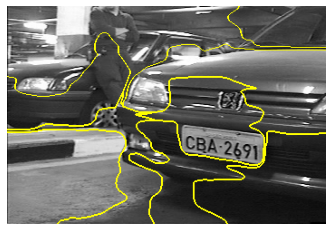

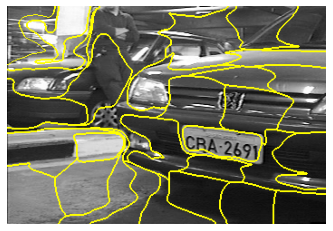

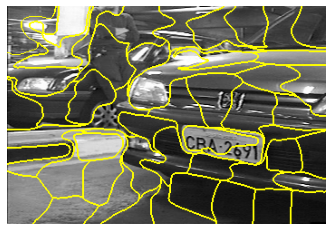

In [16]:
for file_name in os.listdir(originals_folder):
    
    if file_name.endswith(image_filter):
    
        # Reading image
        image_orig = cv2.imread(originals_folder + file_name,cv2.IMREAD_COLOR)
        
        # load the image and convert it to a floating point data type
        image = img_as_float(image_orig)
        
        # loop over the number of segments
        for numSegments in (10, 30, 50):
            
            # apply SLIC and extract (approximately) the supplied number
            # of segments
            segments = slic(image, n_segments = numSegments, sigma = 5, convert2lab = True)
            
            # show the output of SLIC
            fig = plt.figure("Superpixels -- %d segments" % (numSegments))
            ax = fig.add_subplot(1, 1, 1)
            ax.imshow(mark_boundaries(image, segments))
            plt.axis("off")
            
        # show the plots
        plt.show()

### Max Pooling after ReLu

In [17]:
for file_name in os.listdir(originals_folder):
    
    if file_name.endswith(image_filter):
        
        # Looping through files
        print('Processing file: {}'.format(file_name))
    
        # Reading image
        image = cv2.imread(originals_folder + file_name,cv2.IMREAD_GRAYSCALE)

        # Setting initial patch center    
        width_img=50

        # Setting final dimensions
        last_height_img=225
        last_width_img=325
        #last_height_img=75
        #last_width_img=50

        # Setting stride
        stride_pixels=15

        # Defining patch number
        patch_number=1

        while width_img <= last_width_img:

            # Setting initial patch center    
            height_img=50 

            while height_img <= last_height_img:                   

                # Defining some values
                patch_center = np.array([height_img, width_img])        
                patch_scale = 0.38

                # Calc patch position and extract the patch
                smaller_dim = np.min(image.shape[0:2])
                patch_size = int(patch_scale * smaller_dim)
                patch_x = int(patch_center[0] - patch_size / 2.)
                patch_y = int(patch_center[1] - patch_size / 2.)
                patch_image = image[patch_x:patch_x+patch_size, patch_y:patch_y+patch_size]

                # Transforming gray scalte to bgr
                rgb_patch = cv2.cvtColor(patch_image, cv2.COLOR_GRAY2BGR)
                #rgb_patch = patch_image

                # Transforming bgr to ycrcb
                ycrcb_patch = cv2.cvtColor(rgb_patch, cv2.COLOR_BGR2YCrCb)
        
                # Transforming image into an array
                c1_array = np.asarray(ycrcb_patch[:,:,0])
                c2_array = np.maximum(0, np.asarray(ycrcb_patch[:,:,1])+100 )
                c3_array = np.maximum(0, np.asarray(ycrcb_patch[:,:,2])+200 )
                
                # Convolutions - Sobel
                conv_sobel_01 = convolve2D(c1_array,kernel_01_mean)
                conv_sobel_02 = convolve2D(c2_array,kernel_02_mean)
                conv_sobel_03 = convolve2D(c3_array,kernel_03_mean)                
                           
                # ReLu
                relu_01 = relu(conv_sobel_01)
                relu_02 = relu(conv_sobel_02)
                relu_03 = relu(conv_sobel_03)        
                
                # Max Pooling                
                pool_01 = skimage.measure.block_reduce(relu_01, (3,3), np.max)
                pool_02 = skimage.measure.block_reduce(relu_02, (3,3), np.max)
                pool_03 = skimage.measure.block_reduce(relu_03, (3,3), np.max)
                
                # Writing output            
                patch_output = file_name.replace('.png','') + '_p' + str(patch_number) + '_pool_max_01.png'                
                Image.fromarray(pool_01).convert('RGB').save(output_folder + patch_output)
                
                patch_output = file_name.replace('.png','') + '_p' + str(patch_number) + '_pool_max_02.png'                
                Image.fromarray(pool_02).convert('RGB').save(output_folder + patch_output)
                
                patch_output = file_name.replace('.png','') + '_p' + str(patch_number) + '_pool_max_03.png'                
                Image.fromarray(pool_03).convert('RGB').save(output_folder + patch_output)                        
                
                # Updating height loop var
                height_img = height_img + stride_pixels                                
                patch_number = patch_number + 1

            # Updating width loop var
            width_img = width_img + stride_pixels               
        
        # Looping through files
        print('Processed file: {}'.format(file_name))

Processing file: orig_0200.png
Processed file: orig_0200.png


### Average Pooling after ReLu

In [18]:
for file_name in os.listdir(originals_folder):
    
    if file_name.endswith(image_filter):
        
        # Looping through files
        print('Processing file: {}'.format(file_name))
    
        # Reading image
        image = cv2.imread(originals_folder + file_name,cv2.IMREAD_GRAYSCALE)

        # Setting initial patch center    
        width_img=50

        # Setting final dimensions
        last_height_img=225
        last_width_img=325
        #last_height_img=75
        #last_width_img=50

        # Setting stride
        stride_pixels=15

        # Defining patch number
        patch_number=1

        while width_img <= last_width_img:

            # Setting initial patch center    
            height_img=50 

            while height_img <= last_height_img:                   

                # Defining some values
                patch_center = np.array([height_img, width_img])        
                patch_scale = 0.38

                # Calc patch position and extract the patch
                smaller_dim = np.min(image.shape[0:2])
                patch_size = int(patch_scale * smaller_dim)
                patch_x = int(patch_center[0] - patch_size / 2.)
                patch_y = int(patch_center[1] - patch_size / 2.)
                patch_image = image[patch_x:patch_x+patch_size, patch_y:patch_y+patch_size]

                # Transforming gray scalte to bgr
                rgb_patch = cv2.cvtColor(patch_image, cv2.COLOR_GRAY2BGR)
                #rgb_patch = patch_image

                # Transforming bgr to ycrcb
                ycrcb_patch = cv2.cvtColor(rgb_patch, cv2.COLOR_BGR2YCrCb)
        
                # Transforming image into an array
                c1_array = np.asarray(ycrcb_patch[:,:,0])
                c2_array = np.maximum(0, np.asarray(ycrcb_patch[:,:,1])+100 )
                c3_array = np.maximum(0, np.asarray(ycrcb_patch[:,:,2])+200 )
                
                # Convolutions - Sobel
                conv_sobel_01 = convolve2D(c1_array,kernel_01_mean)
                conv_sobel_02 = convolve2D(c2_array,kernel_02_mean)
                conv_sobel_03 = convolve2D(c3_array,kernel_03_mean)                
                           
                # ReLu
                relu_01 = relu(conv_sobel_01)
                relu_02 = relu(conv_sobel_02)
                relu_03 = relu(conv_sobel_03)        
                
                # Max Pooling                
                pool_01 = skimage.measure.block_reduce(relu_01, (3,3), np.mean)
                pool_02 = skimage.measure.block_reduce(relu_02, (3,3), np.mean)
                pool_03 = skimage.measure.block_reduce(relu_03, (3,3), np.mean)
                
                # Writing output            
                patch_output = file_name.replace('.png','') + '_p' + str(patch_number) + '_pool_mean_01.png'                
                Image.fromarray(pool_01).convert('RGB').save(output_folder + patch_output)
                
                patch_output = file_name.replace('.png','') + '_p' + str(patch_number) + '_pool_mean_02.png'                
                Image.fromarray(pool_02).convert('RGB').save(output_folder + patch_output)
                
                patch_output = file_name.replace('.png','') + '_p' + str(patch_number) + '_pool_mean_03.png'                
                Image.fromarray(pool_03).convert('RGB').save(output_folder + patch_output)                        
                
                # Updating height loop var
                height_img = height_img + stride_pixels                                
                patch_number = patch_number + 1

            # Updating width loop var
            width_img = width_img + stride_pixels         
        
        # Looping through files
        print('Processed file: {}'.format(file_name))

Processing file: orig_0200.png
Processed file: orig_0200.png


### Haar-Like

In [19]:
def extract_feature_image(img, feature_type, feature_coord=None):
    """Extract the haar feature for the current image"""
    ii = integral_image(img)
            
    return haar_like_feature(ii, 0, 0, ii.shape[0], ii.shape[1],
                             feature_type=feature_type,
                             feature_coord=feature_coord)

In [20]:
feature_types = ['type-3-x']

for file_name in os.listdir(originals_folder):
    
    if file_name.endswith(image_filter):
    
        # Looping through files
        print('Processing file: {}'.format(file_name))
    
        # Reading image
        image = cv2.imread(originals_folder + file_name,cv2.IMREAD_GRAYSCALE)

        # Setting initial patch center    
        width_img=50

        # Setting final dimensions
        last_height_img=225
        last_width_img=325
        #last_height_img=75
        #last_width_img=50

        # Setting stride
        stride_pixels=15

        # Defining patch number
        patch_number=1

        while width_img <= last_width_img:

            # Setting initial patch center    
            height_img=50 

            while height_img <= last_height_img:                   

                # Defining some values
                patch_center = np.array([height_img, width_img])        
                patch_scale = 0.38

                # Calc patch position and extract the patch
                smaller_dim = np.min(image.shape[0:2])
                patch_size = int(patch_scale * smaller_dim)
                patch_x = int(patch_center[0] - patch_size / 2.)
                patch_y = int(patch_center[1] - patch_size / 2.)
                patch_image = image[patch_x:patch_x+patch_size, patch_y:patch_y+patch_size]

                # Transforming gray scalte to bgr
                rgb_patch = cv2.cvtColor(patch_image, cv2.COLOR_GRAY2BGR)
                #rgb_patch = patch_image
                                
                # Transforming bgr to ycrcb
                ycrcb_patch = cv2.cvtColor(rgb_patch, cv2.COLOR_BGR2YCrCb)
        
                # Transforming image into an array
                c1_array = np.asarray(ycrcb_patch[:,:,0])
                
                
                if (patch_number > 148) and (patch_number < 164):
                    # Haar Like
                    #haar_patch = extract_feature_image(c1_array, feature_types)
                    ii = integral_image(c1_array)
                    features = haar_like_feature(ii, 0, 0, ii.shape[1], ii.shape[0], feature_types)
                    print('Features do patch: {}'.format(patch_number))                         
                    print(features)
                
                # Updating height loop var
                height_img = height_img + stride_pixels                                
                patch_number = patch_number + 1

            # Updating width loop var
            width_img = width_img + stride_pixels       
        
        # Looping through files
        print('Processed file: {}'.format(file_name))

Processing file: orig_0200.png
Features do patch: 149
[-252 -502 -752 ...  -79  -75  -29]
Features do patch: 150
[ -81 -161 -234 ... -139 -140 -126]
Features do patch: 151
[ -72 -157 -222 ...  -29  -29  -29]
Features do patch: 152
[ -84 -114 -159 ...  -23  -28  -27]
Features do patch: 153
[ -65 -135 -201 ...  -16  -19  -18]
Features do patch: 154
[ -50 -100 -170 ...  -17  -27  -21]
Features do patch: 155
[-22 -56 -97 ... -27 -26 -28]
Features do patch: 156
[ -59 -119 -192 ...  -27  -26  -28]
Features do patch: 157
[-253 -502 -737 ...  -25  -25  -27]
Features do patch: 158
[ -90 -163 -269 ...  -74  -67  -62]
Features do patch: 159
[ -84 -195 -280 ...  -79  -79  -79]
Features do patch: 160
[-173 -359 -553 ...  -32  -31  -25]
Features do patch: 161
[-253 -372 -744 ...   -2  -15  -12]
Features do patch: 162
[ -73 -152 -228 ...  -17  -24  -23]
Features do patch: 163
[ -75 -143 -222 ...  -33  -37  -31]
Processed file: orig_0200.png


## FLIM

In [21]:
import flim
from flim.experiments import utils
from flim.models.lcn import LCNCreator

import torch

import numpy as np

import matplotlib.pyplot as plt

In [22]:
if torch.cuda.is_available():
    device = 'cuda:0'
else:
    deice = 'cpu'

/home/felipe/.local/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [23]:
architecture = utils.load_architecture('arch.json')

In [24]:
# the images are in LAB color space and have
images, markers = utils.load_images_and_markers('images_and_markers')

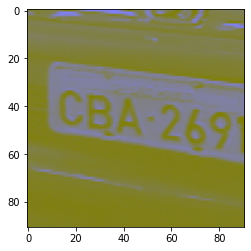

In [25]:
plt.imshow(utils.image_to_rgb(images[1]))

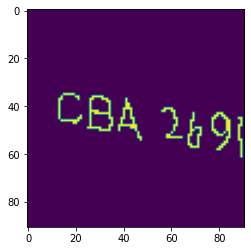

In [26]:
plt.imshow(markers[1])

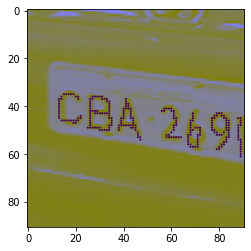

In [27]:
plt.imshow(utils.image_to_rgb(images[1]))

x, y = np.where(markers[1] != 0)

plt.scatter(y, x, s=1, c=markers[1, x, y])


In [28]:
# relabel_markers=True will set a new label for each connected component in the markers
creator = LCNCreator(architecture, images=images, markers=markers, relabel_markers=False, device=deice)

In [29]:
# Build the feature extractor using FLIM
creator.build_feature_extractor()

Building conv
Number of patches 520
Building activation
Building pool
Building norm1


In [30]:
# model is a PyTorch Module https://pytorch.org/docs/stable/generated/torch.nn.Module.html
model = creator.get_LIDSConvNet()

In [31]:
# input mut be a PyTorch Tensor with shape (N, C, H, W)
x = torch.from_numpy(images).permute(0, 3, 1, 2).float().to(deice)

In [32]:
# Processing features
features = model.forward(x)

In [33]:
# Checking features
print(features.size())

torch.Size([4, 64, 91, 91])


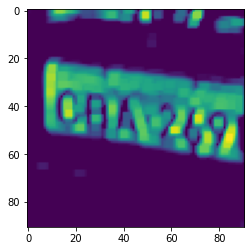

In [34]:
# Printing figure
plt.imshow(features[1, 0, :].detach().cpu())

## Modeling

In this section, we will train the same model (SVM Classifier) with different extracted features (e.g.: Normalization, ReLu, Pooling, haar-like, FLIM) in order to understand how well the model learns from each type of feature or feature combination.

In [35]:
# Creating dataframe for object manipulation
df_raw_number = pd.DataFrame()
df_raw_class = pd.DataFrame()
df_raw_proportion = pd.DataFrame()

In [36]:
# Preparing dataset
for file_name in os.listdir(masks_folder):
    
    if file_name.endswith(image_filter):
        
        # Looping through files
        print('Processing file: {}'.format(file_name))
    
        # Reading image
        image = cv2.imread(masks_folder + file_name,cv2.IMREAD_COLOR)

        # Setting initial patch center    
        width_img=50

        # Setting final dimensions
        last_height_img=225
        last_width_img=325

        # Setting stride
        stride_pixels=15

        # Defining patch number
        patch_number=1

        while width_img <= last_width_img:

            # Setting initial patch center    
            height_img=50 

            while height_img <= last_height_img:                   

                # Defining some values
                patch_center = np.array([height_img, width_img])        
                patch_scale = 0.38

                # Calc patch position and extract the patch
                smaller_dim = np.min(image.shape[0:2])
                patch_size = int(patch_scale * smaller_dim)
                patch_x = int(patch_center[0] - patch_size / 2.)
                patch_y = int(patch_center[1] - patch_size / 2.)
                patch_image = image[patch_x:patch_x+patch_size, patch_y:patch_y+patch_size]

                #Populating dataframes
                if float(np.sum(patch_image).astype(int)/1975995) >= float(0.50) :
                    print('Patch Number: {}'.format(patch_number))
                    print('Positive')
                    df_raw_number = df_raw_number.append([patch_number])
                    df_raw_class = df_raw_class.append([1])
                    df_raw_proportion = df_raw_proportion.append([float(np.sum(patch_image).astype(int)/1975995)])                    
                else:
                    print('Patch Number: {}'.format(patch_number))
                    print('Negative')
                    df_raw_number = df_raw_number.append([patch_number])
                    df_raw_class = df_raw_class.append([0])
                    df_raw_proportion = df_raw_proportion.append([float(np.sum(patch_image).astype(int)/1975995)])                    
                
                # Debugging                            
                #print('Patch Number: {}'.format(patch_number))
                #print(type(pixel_sum))
                #print('Sum: {}'.format(np.sum(patch_image).astype(int)))
                #print('Percentage: {}'.format(np.sum(patch_image).astype(int)/1975995))
                #print('Height: {}'.format(height_img))
                #print('Width: {}'.format(width_img))                
                
                #### Updating height loop var
                height_img = height_img + stride_pixels
                patch_number = patch_number + 1                

            # Updating width loop var
            width_img = width_img + stride_pixels               
        
        # Looping through files
        print('Processed file: {}'.format(file_name))

Processing file: mask_0200.png
Patch Number: 1
Negative
Patch Number: 2
Negative
Patch Number: 3
Negative
Patch Number: 4
Negative
Patch Number: 5
Negative
Patch Number: 6
Negative
Patch Number: 7
Negative
Patch Number: 8
Negative
Patch Number: 9
Negative
Patch Number: 10
Negative
Patch Number: 11
Negative
Patch Number: 12
Negative
Patch Number: 13
Negative
Patch Number: 14
Negative
Patch Number: 15
Negative
Patch Number: 16
Negative
Patch Number: 17
Negative
Patch Number: 18
Negative
Patch Number: 19
Negative
Patch Number: 20
Negative
Patch Number: 21
Negative
Patch Number: 22
Negative
Patch Number: 23
Negative
Patch Number: 24
Negative
Patch Number: 25
Negative
Patch Number: 26
Negative
Patch Number: 27
Negative
Patch Number: 28
Negative
Patch Number: 29
Negative
Patch Number: 30
Negative
Patch Number: 31
Negative
Patch Number: 32
Negative
Patch Number: 33
Negative
Patch Number: 34
Negative
Patch Number: 35
Negative
Patch Number: 36
Negative
Patch Number: 37
Negative
Patch Number: 38

### Model evaluation with raw data

In [37]:
df_raw_features = pd.DataFrame()

for file_name in os.listdir(originals_folder):
    
    if file_name.endswith(image_filter):
        
        # Looping through files
        print('Processing file: {}'.format(file_name))
    
        # Reading image
        image = cv2.imread(originals_folder + file_name,cv2.IMREAD_GRAYSCALE)

        # Setting initial patch center    
        width_img=50

        # Setting final dimensions
        last_height_img=225
        last_width_img=325

        # Setting stride
        stride_pixels=15

        # Defining patch number
        patch_number=1

        while width_img <= last_width_img:

            # Setting initial patch center    
            height_img=50 

            while height_img <= last_height_img:                   

                # Defining some values
                patch_center = np.array([height_img, width_img])        
                patch_scale = 0.38

                # Calc patch position and extract the patch
                smaller_dim = np.min(image.shape[0:2])
                patch_size = int(patch_scale * smaller_dim)
                patch_x = int(patch_center[0] - patch_size / 2.)
                patch_y = int(patch_center[1] - patch_size / 2.)
                patch_image = image[patch_x:patch_x+patch_size, patch_y:patch_y+patch_size]

                #Populating dataframes
                df_raw_features = df_raw_features.append([patch_image.flatten()])                    
                
                # Debugging                            
                #print('Patch Number: {}'.format(patch_number))
                #print(type(pixel_sum))
                #print('Sum: {}'.format(np.sum(patch_image).astype(int)))
                #print('Percentage: {}'.format(np.sum(patch_image).astype(int)/1975995))
                #print('Height: {}'.format(height_img))
                #print('Width: {}'.format(width_img))                
                
                #### Updating height loop var
                height_img = height_img + stride_pixels
                patch_number = patch_number + 1                

            # Updating width loop var
            width_img = width_img + stride_pixels               
        
        # Looping through files
        print('Processed file: {}'.format(file_name))

Processing file: orig_0200.png
Processed file: orig_0200.png


In [38]:
# Managing dataframe
#df_raw_number.drop(axis=1, labels=[0], inplace=True, errors='ignore')
df_raw_number.columns = ['patch_number']
df_raw_number.reset_index(inplace=True, drop=True)
df_raw_number.head()

patch_number
0             1
1             2
2             3
3             4
4             5

In [39]:
# Managing dataframe
#df_raw_class.drop(axis=1, labels=[0], inplace=True, errors='ignore')
df_raw_class.columns = ['class']
df_raw_class.reset_index(inplace=True, drop=True)
df_raw_class.head()

class
0      0
1      0
2      0
3      0
4      0

In [40]:
# Managing dataframe
#df_raw_proportion.drop(axis=1, labels=[0], inplace=True, errors='ignore')
df_raw_proportion.columns = ['plate_proportion']
df_raw_proportion.reset_index(inplace=True, drop=True)
df_raw_proportion.head()

plate_proportion
0               0.0
1               0.0
2               0.0
3               0.0
4               0.0

In [41]:
# Managing dataframe
df_raw_features.reset_index(inplace=True, drop=True)
df_raw_features.head()

0     1     2     3     4     5     6     7     8     9     ...   8271  \
0    87    91    95    93    96   100   103   104   103   100  ...   98.0   
1   155   167   171   166   171   168   162   156   150   146  ...   41.0   
2   162    91    54    67    77    80    82    78    73    74  ...   36.0   
3   134    98   105   110   101    94    90    84    79    76  ...  158.0   
4   221   217   212   194   197   195   189   185   184   178  ...  218.0   

    8272   8273   8274   8275   8276   8277   8278   8279   8280  
0   99.0   99.0  101.0   92.0   77.0   72.0   78.0   72.0   53.0  
1   40.0   38.0   38.0   37.0   38.0   37.0   38.0   38.0   35.0  
2   39.0   39.0   39.0   37.0   38.0   43.0   66.0   87.0   69.0  
3  156.0  153.0  156.0  160.0  158.0  155.0  158.0  157.0  153.0  
4  218.0  218.0  219.0  219.0  218.0  218.0  219.0  218.0  218.0  

[5 rows x 8281 columns]

In [42]:
# Creating full dataframe
df = pd.DataFrame()
frames = [df_raw_number, df_raw_class, df_raw_proportion,df_raw_features]
df_raw = pd.concat(frames, axis=1)
df_raw.head()

patch_number  class  plate_proportion    0    1    2    3    4    5    6  \
0             1      0               0.0   87   91   95   93   96  100  103   
1             2      0               0.0  155  167  171  166  171  168  162   
2             3      0               0.0  162   91   54   67   77   80   82   
3             4      0               0.0  134   98  105  110  101   94   90   
4             5      0               0.0  221  217  212  194  197  195  189   

   ...   8271   8272   8273   8274   8275   8276   8277   8278   8279   8280  
0  ...   98.0   99.0   99.0  101.0   92.0   77.0   72.0   78.0   72.0   53.0  
1  ...   41.0   40.0   38.0   38.0   37.0   38.0   37.0   38.0   38.0   35.0  
2  ...   36.0   39.0   39.0   39.0   37.0   38.0   43.0   66.0   87.0   69.0  
3  ...  158.0  156.0  153.0  156.0  160.0  158.0  155.0  158.0  157.0  153.0  
4  ...  218.0  218.0  218.0  219.0  219.0  218.0  218.0  219.0  218.0  218.0  

[5 rows x 8284 columns]

In [43]:
# Splitting X and Y - Excluding from training plates that are below .50 threshold
df_model = df_raw.dropna()

#X = df_model[(df_model.plate_proportion == 0) | (df_model.plate_proportion >= float(0.50))].drop(['patch_number','class','plate_proportion'], axis=1)
#y = df_model[(df_model.plate_proportion == 0) | (df_model.plate_proportion >= float(0.50))]['class']

X = df_model.drop(['patch_number','class','plate_proportion'], axis=1)
y = df_model['class']

In [44]:
# Splitting train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [45]:
# Training model
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(LinearSVC(random_state=0, C=100))
clf.fit(X_train, y_train)

Pipeline(steps=[('linearsvc', LinearSVC(C=100, random_state=0))])

In [46]:
# Making prediction
y_pred = clf.predict(X_test)

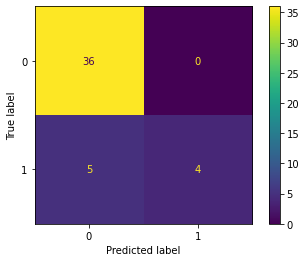

In [47]:
# Assessing confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

In [48]:
# Evaluating model performance
from sklearn.metrics import classification_report
target_names = ['not_plate', 'plate']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   not_plate       0.88      1.00      0.94        36
       plate       1.00      0.44      0.62         9

    accuracy                           0.89        45
   macro avg       0.94      0.72      0.78        45
weighted avg       0.90      0.89      0.87        45



### Model evaluation with features from Convolution (Random Kernel  + Normalization + ReLu + Max Pooling)

In [49]:
df_conv_features = pd.DataFrame()

for file_name in os.listdir(originals_folder):
    
    if file_name.endswith(image_filter):
        
        # Looping through files
        print('Processing file: {}'.format(file_name))
    
        # Reading image
        image = cv2.imread(originals_folder + file_name,cv2.IMREAD_GRAYSCALE)

        # Setting initial patch center    
        width_img=50

        # Setting final dimensions
        last_height_img=225
        last_width_img=325
        #last_height_img=75
        #last_width_img=50

        # Setting stride
        stride_pixels=15

        # Defining patch number
        patch_number=1

        while width_img <= last_width_img:

            # Setting initial patch center    
            height_img=50 

            while height_img <= last_height_img:                   

                # Defining some values
                patch_center = np.array([height_img, width_img])        
                patch_scale = 0.38

                # Calc patch position and extract the patch
                smaller_dim = np.min(image.shape[0:2])
                patch_size = int(patch_scale * smaller_dim)
                patch_x = int(patch_center[0] - patch_size / 2.)
                patch_y = int(patch_center[1] - patch_size / 2.)
                patch_image = image[patch_x:patch_x+patch_size, patch_y:patch_y+patch_size]

                # Transforming gray scalte to bgr
                rgb_patch = cv2.cvtColor(patch_image, cv2.COLOR_GRAY2BGR)
                #rgb_patch = patch_image

                # Transforming bgr to ycrcb
                ycrcb_patch = cv2.cvtColor(rgb_patch, cv2.COLOR_BGR2YCrCb)
        
                # Transforming image into an array
                c1_array = np.asarray(ycrcb_patch[:,:,0])
                c2_array = np.maximum(0, np.asarray(ycrcb_patch[:,:,1])+100 )
                c3_array = np.maximum(0, np.asarray(ycrcb_patch[:,:,2])+200 )
                
                # Convolutions - Sobel
                conv_sobel_01 = convolve2D(c1_array,kernel_01_mean)
                conv_sobel_02 = convolve2D(c2_array,kernel_02_mean)
                conv_sobel_03 = convolve2D(c3_array,kernel_03_mean)                
                           
                # ReLu
                relu_01 = relu(conv_sobel_01)
                relu_02 = relu(conv_sobel_02)
                relu_03 = relu(conv_sobel_03)        
                
                # Max Pooling                
                pool_01 = skimage.measure.block_reduce(relu_01, (3,3), np.max)
                pool_02 = skimage.measure.block_reduce(relu_02, (3,3), np.max)
                pool_03 = skimage.measure.block_reduce(relu_03, (3,3), np.max)
                
                #Populating dataframes
                df_conv_features = df_conv_features.append([pool_01.flatten()])                                    
                
                # Updating height loop var
                height_img = height_img + stride_pixels                                
                patch_number = patch_number + 1

            # Updating width loop var
            width_img = width_img + stride_pixels               
        
        # Looping through files
        print('Processed file: {}'.format(file_name))

Processing file: orig_0200.png
Processed file: orig_0200.png


In [50]:
# Managing dataframe
df_conv_features.reset_index(inplace=True, drop=True)
df_conv_features.head()

0         1         2         3          4          5         6    \
0   0.567686  0.859197  1.126730  2.122528   0.979629   1.079530  1.524595   
1   5.865042  4.266222  2.650950  0.000000   0.000000   4.095040  3.915760   
2  25.555937  4.113305  1.869376  1.583992  13.655063  19.548955  9.575881   
3   3.931019  3.757169  6.393952  3.168681   0.567190   0.810333  1.135243   
4   7.130985  3.174096  2.294934  1.149127   0.312591   2.691812  1.663874   

        7          8          9    ...       890       891       892  \
0  1.948266   3.768343   2.469937  ...  9.039642  4.408893  1.310743   
1  0.892421   1.082873   0.885299  ...  0.569801  1.354306  1.546155   
2  5.505531   4.454765   3.408796  ...  1.088433  0.994633  1.005964   
3  3.190443  13.617998  20.077688  ...  3.730145  1.823984  1.213242   
4  0.730094   2.034612   3.785724  ...  4.664911  0.408218  4.667745   

        893       894       895       896       897       898       899  
0  2.067942  1.824786  1.382826  0.319485  3.929234  1.157662  2.528184  
1  1.143969  0.284667  0.625725  3.244772  2.004676  1.954526  0.476632  
2  2.456465  3.013243  0.965262  0.409888  1.334875  2.163346  2.596844  
3  3.318852  2.846697  1.920092  2.068639  1.498191  1.595283  1.467835  
4  0.000000  2.720364  1.479189  0.000000  0.125383  0.423682  0.024881  

[5 rows x 900 columns]

In [51]:
# Creating full dataframe
df = pd.DataFrame()
frames = [df_raw_number, df_raw_class, df_raw_proportion,df_conv_features]
df = pd.concat(frames, axis=1)
df.head()

patch_number  class  plate_proportion          0         1         2  \
0             1      0               0.0   0.567686  0.859197  1.126730   
1             2      0               0.0   5.865042  4.266222  2.650950   
2             3      0               0.0  25.555937  4.113305  1.869376   
3             4      0               0.0   3.931019  3.757169  6.393952   
4             5      0               0.0   7.130985  3.174096  2.294934   

          3          4          5         6  ...       890       891  \
0  2.122528   0.979629   1.079530  1.524595  ...  9.039642  4.408893   
1  0.000000   0.000000   4.095040  3.915760  ...  0.569801  1.354306   
2  1.583992  13.655063  19.548955  9.575881  ...  1.088433  0.994633   
3  3.168681   0.567190   0.810333  1.135243  ...  3.730145  1.823984   
4  1.149127   0.312591   2.691812  1.663874  ...  4.664911  0.408218   

        892       893       894       895       896       897       898  \
0  1.310743  2.067942  1.824786  1.382826  0.319485  3.929234  1.157662   
1  1.546155  1.143969  0.284667  0.625725  3.244772  2.004676  1.954526   
2  1.005964  2.456465  3.013243  0.965262  0.409888  1.334875  2.163346   
3  1.213242  3.318852  2.846697  1.920092  2.068639  1.498191  1.595283   
4  4.667745  0.000000  2.720364  1.479189  0.000000  0.125383  0.423682   

        899  
0  2.528184  
1  0.476632  
2  2.596844  
3  1.467835  
4  0.024881  

[5 rows x 903 columns]

In [52]:
# Splitting X and Y - Excluding from training plates that are below .50 threshold
df_model = df.dropna()

#X = df_model[(df_model.plate_proportion == 0) | (df_model.plate_proportion >= float(0.50))].drop(['patch_number','class','plate_proportion'], axis=1)
#y = df_model[(df_model.plate_proportion == 0) | (df_model.plate_proportion >= float(0.50))]['class']

X = df_model.drop(['patch_number','class','plate_proportion'], axis=1)
y = df_model['class']

In [53]:
# Splitting train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [54]:
# Training model
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(LinearSVC(random_state=0, C=100))
clf.fit(X_train, y_train)

Pipeline(steps=[('linearsvc', LinearSVC(C=100, random_state=0))])

In [55]:
# Making predictions
y_pred = clf.predict(X_test)

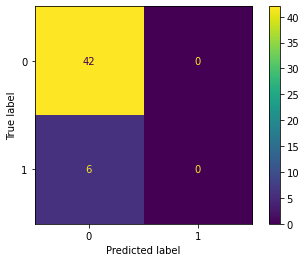

In [56]:
# Assessing confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

In [57]:
# Evaluating model performance
from sklearn.metrics import classification_report
target_names = ['not_plate', 'plate']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   not_plate       0.88      1.00      0.93        42
       plate       0.00      0.00      0.00         6

    accuracy                           0.88        48
   macro avg       0.44      0.50      0.47        48
weighted avg       0.77      0.88      0.82        48



/home/felipe/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/felipe/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/felipe/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Model evaluation with features from Convolution (Sobel Kernel  + Normalization + ReLu + Max Pooling)

In [58]:
df_conv_features = pd.DataFrame()

for file_name in os.listdir(originals_folder):
    
    if file_name.endswith(image_filter):
        
        # Looping through files
        print('Processing file: {}'.format(file_name))
    
        # Reading image
        image = cv2.imread(originals_folder + file_name,cv2.IMREAD_GRAYSCALE)

        # Setting initial patch center    
        width_img=50

        # Setting final dimensions
        last_height_img=225
        last_width_img=325
        #last_height_img=75
        #last_width_img=50

        # Setting stride
        stride_pixels=15

        # Defining patch number
        patch_number=1

        while width_img <= last_width_img:

            # Setting initial patch center    
            height_img=50 

            while height_img <= last_height_img:                   

                # Defining some values
                patch_center = np.array([height_img, width_img])        
                patch_scale = 0.38

                # Calc patch position and extract the patch
                smaller_dim = np.min(image.shape[0:2])
                patch_size = int(patch_scale * smaller_dim)
                patch_x = int(patch_center[0] - patch_size / 2.)
                patch_y = int(patch_center[1] - patch_size / 2.)
                patch_image = image[patch_x:patch_x+patch_size, patch_y:patch_y+patch_size]

                # Transforming gray scalte to bgr
                rgb_patch = cv2.cvtColor(patch_image, cv2.COLOR_GRAY2BGR)
                #rgb_patch = patch_image

                # Transforming bgr to ycrcb
                ycrcb_patch = cv2.cvtColor(rgb_patch, cv2.COLOR_BGR2YCrCb)
        
                # Transforming image into an array
                c1_array = np.asarray(ycrcb_patch[:,:,0])
                c2_array = np.maximum(0, np.asarray(ycrcb_patch[:,:,1])+100 )
                c3_array = np.maximum(0, np.asarray(ycrcb_patch[:,:,2])+200 )
                
                # Convolutions - Sobel
                conv_sobel_01 = convolve2D(c1_array,kernel_sobel)
                conv_sobel_02 = convolve2D(c2_array,kernel_sobel)
                conv_sobel_03 = convolve2D(c3_array,kernel_sobel)                
                           
                # ReLu
                relu_01 = relu(conv_sobel_01)
                relu_02 = relu(conv_sobel_02)
                relu_03 = relu(conv_sobel_03)        
                
                # Max Pooling                
                pool_01 = skimage.measure.block_reduce(relu_01, (3,3), np.max)
                pool_02 = skimage.measure.block_reduce(relu_02, (3,3), np.max)
                pool_03 = skimage.measure.block_reduce(relu_03, (3,3), np.max)
                
                #Populating dataframes
                df_conv_features = df_conv_features.append([pool_01.flatten()])                                    
                
                # Updating height loop var
                height_img = height_img + stride_pixels                                
                patch_number = patch_number + 1

            # Updating width loop var
            width_img = width_img + stride_pixels               
        
        # Looping through files
        print('Processed file: {}'.format(file_name))

Processing file: orig_0200.png
Processed file: orig_0200.png


In [59]:
# Managing dataframe
df_conv_features.reset_index(inplace=True, drop=True)
df_conv_features.head()

0    1    2    3    4    5    6    7    8    9    ...  890  891  892  893  \
0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  93.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

   894  895  896  897  898  899  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 900 columns]

In [60]:
# Creating full dataframe
df = pd.DataFrame()
frames = [df_raw_number, df_raw_class, df_raw_proportion,df_conv_features]
df = pd.concat(frames, axis=1)
df.head()

patch_number  class  plate_proportion     0    1    2    3    4    5    6  \
0             1      0               0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1             2      0               0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2             3      0               0.0  93.0  0.0  0.0  0.0  0.0  0.0  0.0   
3             4      0               0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4             5      0               0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   ...  890  891  892  893  894  895  896  897  898  899  
0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 903 columns]

In [61]:
# Splitting X and Y - Excluding from training plates that are below .50 threshold
df_model = df.dropna()

#X = df_model[(df_model.plate_proportion == 0) | (df_model.plate_proportion >= float(0.50))].drop(['patch_number','class','plate_proportion'], axis=1)
#y = df_model[(df_model.plate_proportion == 0) | (df_model.plate_proportion >= float(0.50))]['class']

X = df_model.drop(['patch_number','class','plate_proportion'], axis=1)
y = df_model['class']

In [62]:
# Splitting train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [63]:
# Training model
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(LinearSVC(random_state=0, C=100))
clf.fit(X_train, y_train)

Pipeline(steps=[('linearsvc', LinearSVC(C=100, random_state=0))])

In [64]:
# Making predictions
y_pred = clf.predict(X_test)

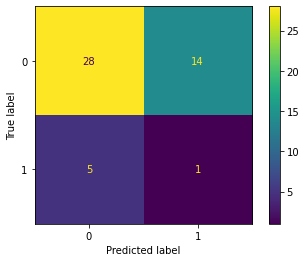

In [65]:
# Assessing confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

In [66]:
# Evaluating model performance
from sklearn.metrics import classification_report
target_names = ['not_plate', 'plate']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   not_plate       0.85      0.67      0.75        42
       plate       0.07      0.17      0.10         6

    accuracy                           0.60        48
   macro avg       0.46      0.42      0.42        48
weighted avg       0.75      0.60      0.67        48



### Model evaluation with features from FLIM

In [67]:
# Creating dataframe
df_flim_features = pd.DataFrame()
df_flim_features = df_flim_features.append([features[0, 0, :].detach().numpy().flatten()])                                    
df_flim_features = df_flim_features.append([features[1, 0, :].detach().numpy().flatten()])                                    
df_flim_features = df_flim_features.append([features[2, 0, :].detach().numpy().flatten()])                                    
df_flim_features = df_flim_features.append([features[3, 0, :].detach().numpy().flatten()])                                    
df_flim_features.head()

#plt.imshow(features[1, 0, :].detach().cpu())

0         1         2         3         4         5         6     \
0 -0.752709 -0.745347 -0.733946 -0.711363 -0.691371 -0.691371 -0.686673   
0 -0.733800 -0.733800 -0.752709 -0.752709 -0.752709 -0.752709 -0.752709   
0 -0.752709 -0.752709 -0.752709 -0.752709 -0.752709 -0.752709 -0.752709   
0 -0.213346 -0.213346 -0.242510 -0.418425 -0.437132 -0.450337 -0.480584   

       7         8         9     ...      8271      8272      8273      8274  \
0 -0.686673 -0.686673 -0.694758  ... -0.752709 -0.752709 -0.752709 -0.752709   
0 -0.752709 -0.505489 -0.183415  ... -0.752709 -0.752709 -0.752709 -0.752709   
0 -0.752709 -0.752709 -0.752709  ... -0.752709 -0.752709 -0.752709 -0.752709   
0 -0.486102 -0.415203 -0.345793  ... -0.752709 -0.752709 -0.752709 -0.752709   

       8275      8276      8277      8278      8279      8280  
0 -0.752709 -0.752709 -0.752709 -0.752709 -0.709679 -0.709679  
0 -0.752709 -0.752709 -0.752709 -0.752709 -0.669092 -0.669092  
0 -0.752709 -0.752709 -0.752709 -0.752709 -0.668115 -0.668115  
0 -0.752709 -0.752709 -0.752709 -0.752709 -0.675750 -0.675750  

[4 rows x 8281 columns]

In [68]:
# Managing dataframe
df_flim_features.reset_index(inplace=True, drop=True)
df_flim_features.head()

0         1         2         3         4         5         6     \
0 -0.752709 -0.745347 -0.733946 -0.711363 -0.691371 -0.691371 -0.686673   
1 -0.733800 -0.733800 -0.752709 -0.752709 -0.752709 -0.752709 -0.752709   
2 -0.752709 -0.752709 -0.752709 -0.752709 -0.752709 -0.752709 -0.752709   
3 -0.213346 -0.213346 -0.242510 -0.418425 -0.437132 -0.450337 -0.480584   

       7         8         9     ...      8271      8272      8273      8274  \
0 -0.686673 -0.686673 -0.694758  ... -0.752709 -0.752709 -0.752709 -0.752709   
1 -0.752709 -0.505489 -0.183415  ... -0.752709 -0.752709 -0.752709 -0.752709   
2 -0.752709 -0.752709 -0.752709  ... -0.752709 -0.752709 -0.752709 -0.752709   
3 -0.486102 -0.415203 -0.345793  ... -0.752709 -0.752709 -0.752709 -0.752709   

       8275      8276      8277      8278      8279      8280  
0 -0.752709 -0.752709 -0.752709 -0.752709 -0.709679 -0.709679  
1 -0.752709 -0.752709 -0.752709 -0.752709 -0.669092 -0.669092  
2 -0.752709 -0.752709 -0.752709 -0.752709 -0.668115 -0.668115  
3 -0.752709 -0.752709 -0.752709 -0.752709 -0.675750 -0.675750  

[4 rows x 8281 columns]

In [69]:
# Creating FLIM labels
df_flim_class = pd.DataFrame()
df_flim_class = df_flim_class.append([0])
df_flim_class = df_flim_class.append([1])
df_flim_class = df_flim_class.append([1])
df_flim_class = df_flim_class.append([0])
df_flim_class.columns = ['class']
df_flim_class.head()

class
0      0
0      1
0      1
0      0

In [70]:
# Managing dataframe
df_flim_class.reset_index(inplace=True, drop=True)
df_flim_class.head()

class
0      0
1      1
2      1
3      0

In [71]:
# Creating full dataframe
df = pd.DataFrame()
frames = [df_flim_class, df_flim_features]
df = pd.concat(frames, axis=1)
df.head()

class         0         1         2         3         4         5  \
0      0 -0.752709 -0.745347 -0.733946 -0.711363 -0.691371 -0.691371   
1      1 -0.733800 -0.733800 -0.752709 -0.752709 -0.752709 -0.752709   
2      1 -0.752709 -0.752709 -0.752709 -0.752709 -0.752709 -0.752709   
3      0 -0.213346 -0.213346 -0.242510 -0.418425 -0.437132 -0.450337   

          6         7         8  ...      8271      8272      8273      8274  \
0 -0.686673 -0.686673 -0.686673  ... -0.752709 -0.752709 -0.752709 -0.752709   
1 -0.752709 -0.752709 -0.505489  ... -0.752709 -0.752709 -0.752709 -0.752709   
2 -0.752709 -0.752709 -0.752709  ... -0.752709 -0.752709 -0.752709 -0.752709   
3 -0.480584 -0.486102 -0.415203  ... -0.752709 -0.752709 -0.752709 -0.752709   

       8275      8276      8277      8278      8279      8280  
0 -0.752709 -0.752709 -0.752709 -0.752709 -0.709679 -0.709679  
1 -0.752709 -0.752709 -0.752709 -0.752709 -0.669092 -0.669092  
2 -0.752709 -0.752709 -0.752709 -0.752709 -0.668115 -0.668115  
3 -0.752709 -0.752709 -0.752709 -0.752709 -0.675750 -0.675750  

[4 rows x 8282 columns]

In [72]:
# Splitting X and Y - Excluding from training plates that are below .50 threshold
df_model = df.dropna()

#X = df_model[(df_model.plate_proportion == 0) | (df_model.plate_proportion >= float(0.50))].drop(['patch_number','class','plate_proportion'], axis=1)
#y = df_model[(df_model.plate_proportion == 0) | (df_model.plate_proportion >= float(0.50))]['class']

X = df_model.drop(['class'], axis=1)
y = df_model['class']

In [73]:
# Splitting train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [74]:
# Training model
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(LinearSVC(random_state=0, C=100))
clf.fit(X_train, y_train)

Pipeline(steps=[('linearsvc', LinearSVC(C=100, random_state=0))])

In [75]:
# Making predictions
y_pred = clf.predict(X_test)

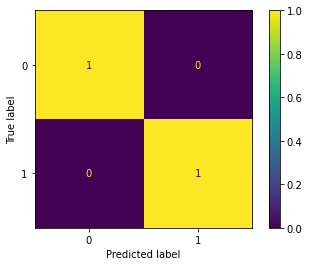

In [76]:
# Assessing confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

In [77]:
# Evaluating model performance
from sklearn.metrics import classification_report
target_names = ['not_plate', 'plate']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   not_plate       1.00      1.00      1.00         1
       plate       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



### Model evaluation with features from haar-like

In [78]:
# Defining important variables
df_haar_features = pd.DataFrame()
df_raw_number = pd.DataFrame()
df_raw_class = pd.DataFrame()
df_raw_proportion = pd.DataFrame()
feature_types = ['type-3-x']

In [79]:
# Preparing labels
for file_name in os.listdir(masks_folder):
    
    if file_name.endswith(image_filter):
        
        # Looping through files
        print('Processing file: {}'.format(file_name))
    
        # Reading image
        image = cv2.imread(masks_folder + file_name,cv2.IMREAD_COLOR)

        # Setting initial patch center    
        width_img=50

        # Setting final dimensions
        last_height_img=225
        last_width_img=325

        # Setting stride
        stride_pixels=15

        # Defining patch number
        patch_number=1

        while width_img <= last_width_img:

            # Setting initial patch center    
            height_img=50 

            while height_img <= last_height_img:                   

                # Defining some values
                patch_center = np.array([height_img, width_img])        
                patch_scale = 0.38

                # Calc patch position and extract the patch
                smaller_dim = np.min(image.shape[0:2])
                patch_size = int(patch_scale * smaller_dim)
                patch_x = int(patch_center[0] - patch_size / 2.)
                patch_y = int(patch_center[1] - patch_size / 2.)
                patch_image = image[patch_x:patch_x+patch_size, patch_y:patch_y+patch_size]
                
                if (patch_number > 148) and (patch_number < 160):

                    #Populating dataframes
                    if float(np.sum(patch_image).astype(int)/1975995) >= float(0.50) :
                        print('Patch Number: {}'.format(patch_number))
                        print('Positive')
                        df_raw_number = df_raw_number.append([patch_number])
                        df_raw_class = df_raw_class.append([1])
                        df_raw_proportion = df_raw_proportion.append([float(np.sum(patch_image).astype(int)/1975995)])                    
                    else:
                        print('Patch Number: {}'.format(patch_number))
                        print('Negative')
                        df_raw_number = df_raw_number.append([patch_number])
                        df_raw_class = df_raw_class.append([0])
                        df_raw_proportion = df_raw_proportion.append([float(np.sum(patch_image).astype(int)/1975995)])                    
                
                # Debugging                            
                #print('Patch Number: {}'.format(patch_number))
                #print(type(pixel_sum))
                #print('Sum: {}'.format(np.sum(patch_image).astype(int)))
                #print('Percentage: {}'.format(np.sum(patch_image).astype(int)/1975995))
                #print('Height: {}'.format(height_img))
                #print('Width: {}'.format(width_img))                
                
                #### Updating height loop var
                height_img = height_img + stride_pixels
                patch_number = patch_number + 1                

            # Updating width loop var
            width_img = width_img + stride_pixels               
        
        # Looping through files
        print('Processed file: {}'.format(file_name))

Processing file: mask_0200.png
Patch Number: 149
Positive
Patch Number: 150
Positive
Patch Number: 151
Positive
Patch Number: 152
Positive
Patch Number: 153
Positive
Patch Number: 154
Positive
Patch Number: 155
Negative
Patch Number: 156
Negative
Patch Number: 157
Negative
Patch Number: 158
Negative
Patch Number: 159
Negative
Processed file: mask_0200.png


In [80]:
# Processing data
for file_name in os.listdir(originals_folder):
    
    if file_name.endswith(image_filter):
    
        # Looping through files
        print('Processing file: {}'.format(file_name))
    
        # Reading image
        image = cv2.imread(originals_folder + file_name,cv2.IMREAD_GRAYSCALE)

        # Setting initial patch center    
        width_img=50

        # Setting final dimensions
        last_height_img=225
        last_width_img=325
        #last_height_img=75
        #last_width_img=50

        # Setting stride
        stride_pixels=15

        # Defining patch number
        patch_number=1

        while width_img <= last_width_img:

            # Setting initial patch center    
            height_img=50 

            while height_img <= last_height_img:                   

                # Defining some values
                patch_center = np.array([height_img, width_img])        
                patch_scale = 0.38

                # Calc patch position and extract the patch
                smaller_dim = np.min(image.shape[0:2])
                patch_size = int(patch_scale * smaller_dim)
                patch_x = int(patch_center[0] - patch_size / 2.)
                patch_y = int(patch_center[1] - patch_size / 2.)
                patch_image = image[patch_x:patch_x+patch_size, patch_y:patch_y+patch_size]

                # Transforming gray scalte to bgr
                rgb_patch = cv2.cvtColor(patch_image, cv2.COLOR_GRAY2BGR)
                #rgb_patch = patch_image
                                
                # Transforming bgr to ycrcb
                ycrcb_patch = cv2.cvtColor(rgb_patch, cv2.COLOR_BGR2YCrCb)
        
                # Transforming image into an array
                c1_array = np.asarray(ycrcb_patch[:,:,0])
                
                # Filtering haar like because of heavy processing
                if (patch_number > 148) and (patch_number < 160):             
                    
                    # Haar Like
                    #haar_patch = extract_feature_image(c1_array, feature_types)
                    ii = integral_image(c1_array)
                    features = haar_like_feature(ii, 0, 0, ii.shape[1], ii.shape[0], feature_types)
                
                    #Populating dataframes
                    df_haar_features = df_haar_features.append([features.flatten()])                                    
                
                # Updating height loop var
                print('Processed patch: {}'.format(patch_number))
                height_img = height_img + stride_pixels                                
                patch_number = patch_number + 1

            # Updating width loop var
            width_img = width_img + stride_pixels       
        
        # Looping through files
        print('Processed file: {}'.format(file_name))

Processing file: orig_0200.png
Processed patch: 1
Processed patch: 2
Processed patch: 3
Processed patch: 4
Processed patch: 5
Processed patch: 6
Processed patch: 7
Processed patch: 8
Processed patch: 9
Processed patch: 10
Processed patch: 11
Processed patch: 12
Processed patch: 13
Processed patch: 14
Processed patch: 15
Processed patch: 16
Processed patch: 17
Processed patch: 18
Processed patch: 19
Processed patch: 20
Processed patch: 21
Processed patch: 22
Processed patch: 23
Processed patch: 24
Processed patch: 25
Processed patch: 26
Processed patch: 27
Processed patch: 28
Processed patch: 29
Processed patch: 30
Processed patch: 31
Processed patch: 32
Processed patch: 33
Processed patch: 34
Processed patch: 35
Processed patch: 36
Processed patch: 37
Processed patch: 38
Processed patch: 39
Processed patch: 40
Processed patch: 41
Processed patch: 42
Processed patch: 43
Processed patch: 44
Processed patch: 45
Processed patch: 46
Processed patch: 47
Processed patch: 48
Processed patch: 4

In [81]:
# Managing dataframe
df_haar_features.reset_index(inplace=True, drop=True)
df_haar_features.head()

0        1        2        3        4        5        6        7        \
0     -252     -502     -752     -997    -1259    -1520    -1577    -1613   
1      -81     -161     -234     -316     -391     -470     -547     -619   
2      -72     -157     -222     -294     -357     -434     -516     -593   
3      -84     -114     -159     -245     -287     -181     -115     -489   
4      -65     -135     -201     -265     -334     -408     -482     -550   

   8        9        ...  5712515  5712516  5712517  5712518  5712519  \
0    -1657    -1888  ...    213.0   -104.0     77.0    -77.0     30.0   
1     -695     -772  ...   -425.0   -150.0   -309.0   -150.0   -284.0   
2     -651     -719  ...    -86.0    -30.0    -59.0    -30.0    -55.0   
3    -1300    -2084  ...    -85.0    -24.0    -57.0    -26.0    -54.0   
4     -626     -698  ...    -51.0    -19.0    -27.0    -16.0    -35.0   

   5712520  5712521  5712522  5712523  5712524  
0    -85.0   -168.0    -79.0    -75.0    -29.0  
1   -150.0   -252.0   -139.0   -140.0   -126.0  
2    -29.0    -56.0    -29.0    -29.0    -29.0  
3    -28.0    -51.0    -23.0    -28.0    -27.0  
4    -18.0    -46.0    -16.0    -19.0    -18.0  

[5 rows x 5712525 columns]

In [82]:
# Managing dataframe
#df_raw_number.drop(axis=1, labels=[0], inplace=True, errors='ignore')
df_raw_number.columns = ['patch_number']
df_raw_number.reset_index(inplace=True, drop=True)
df_raw_number.head()

patch_number
0           149
1           150
2           151
3           152
4           153

In [83]:
# Managing dataframe
#df_raw_class.drop(axis=1, labels=[0], inplace=True, errors='ignore')
df_raw_class.columns = ['class']
df_raw_class.reset_index(inplace=True, drop=True)
df_raw_class.head()

class
0      1
1      1
2      1
3      1
4      1

In [84]:
# Managing dataframe
#df_raw_proportion.drop(axis=1, labels=[0], inplace=True, errors='ignore')
df_raw_proportion.columns = ['plate_proportion']
df_raw_proportion.reset_index(inplace=True, drop=True)
df_raw_proportion.head()

plate_proportion
0          0.632985
1          0.983740
2          1.000000
3          1.000000
4          1.000000

In [85]:
# Creating full dataframe
df = pd.DataFrame()
frames = [df_raw_number, df_raw_class, df_raw_proportion,df_haar_features]
df = pd.concat(frames, axis=1)
df.head()

patch_number  class  plate_proportion    0    1    2    3     4     5  \
0           149      1          0.632985 -252 -502 -752 -997 -1259 -1520   
1           150      1          0.983740  -81 -161 -234 -316  -391  -470   
2           151      1          1.000000  -72 -157 -222 -294  -357  -434   
3           152      1          1.000000  -84 -114 -159 -245  -287  -181   
4           153      1          1.000000  -65 -135 -201 -265  -334  -408   

      6  ...  5712515  5712516  5712517  5712518  5712519  5712520  5712521  \
0 -1577  ...    213.0   -104.0     77.0    -77.0     30.0    -85.0   -168.0   
1  -547  ...   -425.0   -150.0   -309.0   -150.0   -284.0   -150.0   -252.0   
2  -516  ...    -86.0    -30.0    -59.0    -30.0    -55.0    -29.0    -56.0   
3  -115  ...    -85.0    -24.0    -57.0    -26.0    -54.0    -28.0    -51.0   
4  -482  ...    -51.0    -19.0    -27.0    -16.0    -35.0    -18.0    -46.0   

   5712522  5712523  5712524  
0    -79.0    -75.0    -29.0  
1   -139.0   -140.0   -126.0  
2    -29.0    -29.0    -29.0  
3    -23.0    -28.0    -27.0  
4    -16.0    -19.0    -18.0  

[5 rows x 5712528 columns]

In [86]:
# Splitting X and Y - Excluding from training plates that are below .50 threshold
df_model = df.dropna()

#X = df_model[(df_model.plate_proportion == 0) | (df_model.plate_proportion >= float(0.50))].drop(['patch_number','class','plate_proportion'], axis=1)
#y = df_model[(df_model.plate_proportion == 0) | (df_model.plate_proportion >= float(0.50))]['class']

X = df_model.drop(['patch_number','class','plate_proportion'], axis=1)
y = df_model['class']

In [87]:
# Splitting train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [88]:
# Training model
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(LinearSVC(random_state=0, C=100))
clf.fit(X_train, y_train)

/home/felipe/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('linearsvc', LinearSVC(C=100, random_state=0))])

In [89]:
# Making predictions
y_pred = clf.predict(X_test)

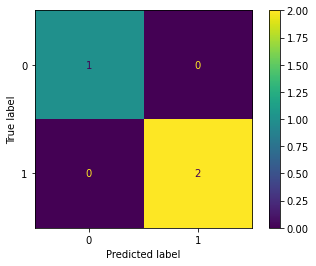

In [90]:
# Assessing confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

In [91]:
# Evaluating model performance
from sklearn.metrics import classification_report
target_names = ['not_plate', 'plate']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   not_plate       1.00      1.00      1.00         1
       plate       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

